In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import sklearn.externals
import joblib 
import IPython.display 
import sklearn.tree 
import pydotplus
import os

In [16]:
dns2tcp_mal = pd.read_csv('mal-dns2tcp.csv', delimiter=',')
dnscat2_mal = pd.read_csv('mal-dnscat2.csv', delimiter=',')
iodine_mal = pd.read_csv('mal-iodine.csv', delimiter=',')
data_mal = pd.concat([dns2tcp_mal,dnscat2_mal])
data_mal = pd.concat([data_mal,iodine_mal])
data_doh = pd.read_csv('12-benign-doh.csv', delimiter=',')
data_mal.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,192.168.20.209,1.1.1.1,39406,443,2020-04-01 22:55:13,120.772871,42357,350.716180,71915,595.456574,...,0.489724,4.023502e-01,0.634311,0.163861,0.001734,0.000006,0.766785,0.258319,3.871039,True
1,1.1.1.1,192.168.20.209,443,39406,2020-04-01 22:57:14,120.656643,78950,654.336123,46138,382.390881,...,0.617101,1.243765e-08,0.000112,0.000050,0.000034,0.000021,0.433249,0.260983,2.225769,True
2,1.1.1.1,192.168.20.209,443,39406,2020-04-01 22:59:15,120.692061,78559,650.904453,46805,387.805127,...,0.617322,8.999716e-09,0.000095,0.000046,0.000031,0.000024,0.471856,0.231073,2.065863,True
3,1.1.1.1,192.168.20.209,443,39406,2020-04-01 23:01:15,120.644016,78133,647.632619,46444,384.967291,...,0.608922,7.678121e-09,0.000088,0.000048,0.000035,0.000021,0.444360,0.307892,1.826318,True
4,1.1.1.1,192.168.20.209,443,39406,2020-04-01 23:03:16,120.883686,79169,654.918812,47193,390.400074,...,0.615777,1.310879e-08,0.000114,0.000048,0.000030,0.000018,0.470369,0.261599,2.387701,True


In [18]:
data_doh.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:49,95.081550,62311,655.342703,65358,687.388878,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,True
1,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:50,122.309318,93828,767.136973,101232,827.672018,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,True
2,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:52,120.958413,38784,320.639127,38236,316.108645,...,0.732636,0.000785,0.028021,0.029238,0.026922,0.026855,0.248064,0.085061,0.958348,True
3,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:54,110.501080,61993,561.017141,69757,631.278898,...,0.646859,0.000411,0.020274,0.019925,0.019268,0.026918,0.097199,-0.344926,1.017535,True
4,176.103.130.131,192.168.20.191,443,50749,2020/1/14 15:56,54.229891,83641,1542.341289,76804,1416.266907,...,0.507334,0.079079,0.281209,0.025930,0.000046,0.000021,0.276133,0.092135,10.844829,True


In [19]:
data_doh['DoH'] = 'bendoh'
data_mal['DoH'] = 'maldoh'
data_doh = data_doh.rename(columns={'DoH': 'Label'})
data_mal = data_mal.rename(columns={'DoH': 'Label'})
print(f'Number of ben = {len(data_doh)}')
print(f'Number of mal = {len(data_mal)}')



Number of ben = 19807
Number of mal = 249969


In [20]:
dataset = pd.concat([data_doh,data_mal])
print(dataset.groupby('Label').size())

Label
bendoh     19807
maldoh    249969
dtype: int64


In [21]:
null = dataset.isnull()
print(dataset.isnull().any().any())
print(null.sum())
dataset['ResponseTimeTimeMedian'] = dataset['ResponseTimeTimeMedian'].fillna(0)
dataset['ResponseTimeTimeSkewFromMedian'] = dataset['ResponseTimeTimeSkewFromMedian'].fillna(0)
null = dataset.isnull()
print("New: ", dataset.isnull().any().any())
print("New: ", null.sum())

True
SourceIP                                    0
DestinationIP                               0
SourcePort                                  0
DestinationPort                             0
TimeStamp                                   0
Duration                                    0
FlowBytesSent                               0
FlowSentRate                                0
FlowBytesReceived                           0
FlowReceivedRate                            0
PacketLengthVariance                        0
PacketLengthStandardDeviation               0
PacketLengthMean                            0
PacketLengthMedian                          0
PacketLengthMode                            0
PacketLengthSkewFromMedian                  0
PacketLengthSkewFromMode                    0
PacketLengthCoefficientofVariation          0
PacketTimeVariance                          0
PacketTimeStandardDeviation                 0
PacketTimeMean                              0
PacketTimeMedian             

In [22]:
dataset.columns
cols = dataset.drop(labels = ['TimeStamp','SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort','Duration','FlowBytesSent','FlowSentRate', 'PacketTimeSkewFromMedian'], axis = 1)
cols.columns

Index(['FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMode',
       'PacketTimeCoefficientofVariation', 'ResponseTimeTimeVariance',
       'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean',
       'ResponseTimeTimeMedian', 'ResponseTimeTimeMode',
       'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'Label'],
      dtype='object')

In [23]:
from sklearn.preprocessing import MinMaxScaler
array = cols.values
print(array)
X = array[:,0:25]
Y = array[:,25]
#Y = Y.astype('int')
validation_size = 0.30
seed = 65
# 创建 MinMaxScaler 对象
scaler = MinMaxScaler()

# 使用 fit_transform 方法对特征进行缩放
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

[[65358 687.3888783 7474.676771 ... 0.024714815 1.174947648 'bendoh']
 [101232 827.6720176 10458.1186 ... -0.07584524 1.402381756 'bendoh']
 [38236 316.1086447 7300.293933 ... 0.085061157 0.958347923 'bendoh']
 ...
 [41495 343.1591753862273 220428.0018502017 ... 0.8468200856265894
  1.1808181546927088 'maldoh']
 [39744 330.94449154743006 215508.35836071672 ... 0.8566471369471551
  1.1672735373019458 'maldoh']
 [22225 341.7429731186592 214804.5394637845 ... 0.8594896211345133
  1.1634139138982285 'maldoh']]


In [24]:
scoring = 'accuracy'
print(scoring)
X_test.shape

accuracy


(80933, 25)

In [25]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier,StackingClassifier

In [26]:
estimators = [('lgbm', lgb.LGBMClassifier()), ('rf', RandomForestClassifier())]
stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())

In [27]:
models = []
models.append(('SC', stacking))
print(models)

[('SC', StackingClassifier(estimators=[('lgbm', LGBMClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier()))]


In [28]:
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        print(cv_results)
        results.append(cv_results)
        names.append(name)
        msg = "%s Accuracy: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

[0.99997352 0.99986762 0.99997352 0.99997352 1.        ]
SC Accuracy: 0.999958 (+/- 0.000046)


stacking Accuracy test set result
0.9999629323020276
ETC accuracy test:
 0.9999629323020276

Confusion Matrix:
 [[ 5955     2]
 [    1 74975]]

Classfication report:
               precision    recall  f1-score   support

      bendoh       1.00      1.00      1.00      5957
      maldoh       1.00      1.00      1.00     74976

    accuracy                           1.00     80933
   macro avg       1.00      1.00      1.00     80933
weighted avg       1.00      1.00      1.00     80933



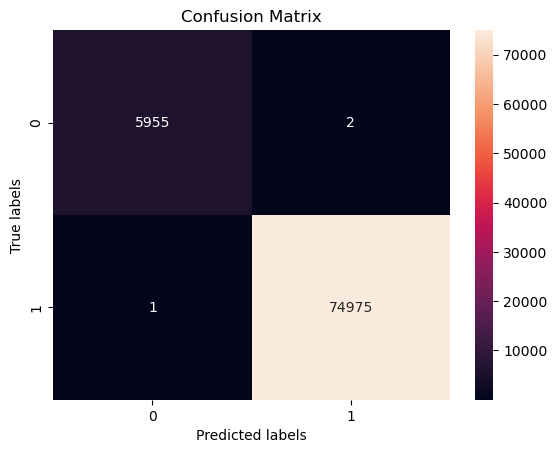

Validating Feature importance
[0.01822503 0.01716805 0.03474729 0.05402646 0.04611145 0.04362831
 0.10725832 0.0366165  0.04593699 0.0894348  0.07614902 0.08970876
 0.04588578 0.03652813 0.00415235 0.01691025 0.02664942 0.01348748
 0.01636949 0.01672446 0.01883924 0.0125138  0.05967557 0.06177796
 0.01147509]


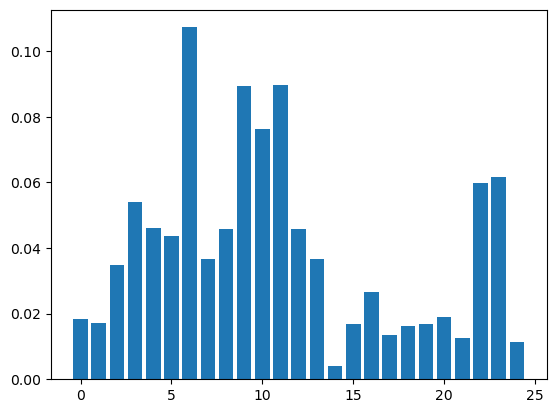

<Axes: >

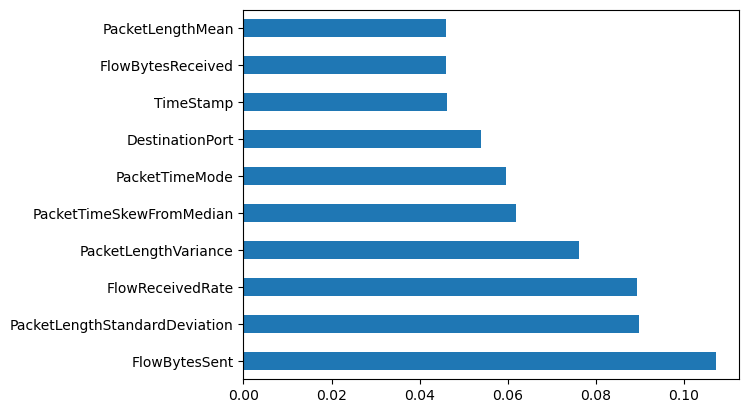

In [29]:
print("stacking Accuracy test set result")
etc = stacking
etc.fit(X_train, Y_train)
filename = 'finalized_RFC_model.sav'
joblib.dump(etc, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print (result)

predictions_etc = etc.predict(X_test)
print("ETC accuracy test:\n",accuracy_score(Y_test, predictions_etc))
print("\nConfusion Matrix:\n",confusion_matrix(Y_test, predictions_etc))
print("\nClassfication report:\n",classification_report(Y_test, predictions_etc))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(Y_test, predictions_etc)
sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


print ("Validating Feature importance")
#fit an Extra Trees model to the data
test_model = ExtraTreesClassifier()
test_model.fit(X_train, Y_train)
#display the relative importance of each attribute
print(test_model.feature_importances_)
#plot
plt.bar(range(len(test_model.feature_importances_)), test_model.feature_importances_)
plt.show()

df = dataset.reset_index(drop = False)
feat_importances = pd.Series(test_model.feature_importances_, index=dataset.columns[0:25])
feat_importances.nlargest(10).plot(kind='barh')